## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""


In [1]:
import os
import keras

# 請嘗試設定 GPU：os.environ


Using TensorFlow backend.


In [23]:
train, test = keras.datasets.cifar10.load_data()

In [27]:
## 資料前處理
"""
Your code here
"""
from sklearn.preprocessing import MinMaxScaler

def preproc_x(x, flatten=True):
    if flatten:
        x = x.reshape((len(x), -1))
    scaler = MinMaxScaler(feature_range=(-1, 1))
    return scaler.fit_transform(x)

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y 

In [28]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [36]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 64, 32, 16]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
hidd

In [37]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [38]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [39]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 8s 168us/step - loss: 1.8298 - acc: 0.3507 - val_loss: 1.6439 - val_acc: 0.4244
Epoch 2/100
50000/50000 [==============================] - 8s 153us/step - loss: 1.5488 - acc: 0.4571 - val_loss: 1.5041 - val_acc: 0.4738
Epoch 3/100
50000/50000 [==============================] - 8s 152us/step - loss: 1.4156 - acc: 0.5043 - val_loss: 1.4199 - val_acc: 0.4988
Epoch 4/100
50000/50000 [==============================] - 7s 147us/step - loss: 1.3269 - acc: 0.5347 - val_loss: 1.4002 - val_acc: 0.5121
Epoch 5/100
50000/50000 [==============================] - 7s 146us/step - loss: 1.2393 - acc: 0.5653 - val_loss: 1.3785 - val_acc: 0.5211
Epoch 6/100
50000/50000 [==============================] - 7s 146us/step - loss: 1.1648 - acc: 0.5933 - val_loss: 1.3866 - val_acc: 0.5243
Epoch 7/100
50000/50000 [==============================] - 7s 148us/

50000/50000 [==============================] - 9s 185us/step - loss: 0.1189 - acc: 0.9611 - val_loss: 3.4970 - val_acc: 0.5357
Epoch 58/100
50000/50000 [==============================] - 10s 199us/step - loss: 0.1174 - acc: 0.9606 - val_loss: 3.5415 - val_acc: 0.5363
Epoch 59/100
50000/50000 [==============================] - 9s 184us/step - loss: 0.0960 - acc: 0.9673 - val_loss: 3.6179 - val_acc: 0.5340
Epoch 60/100
50000/50000 [==============================] - 9s 185us/step - loss: 0.1093 - acc: 0.9636 - val_loss: 3.5047 - val_acc: 0.5281
Epoch 61/100
50000/50000 [==============================] - 9s 188us/step - loss: 0.1062 - acc: 0.9656 - val_loss: 3.4955 - val_acc: 0.5378
Epoch 62/100
50000/50000 [==============================] - 11s 210us/step - loss: 0.0845 - acc: 0.9721 - val_loss: 3.6129 - val_acc: 0.5322
Epoch 63/100
50000/50000 [==============================] - 9s 183us/step - loss: 0.1018 - acc: 0.9668 - val_loss: 3.5282 - val_acc: 0.5386
Epoch 64/100
50000/50000 [=====

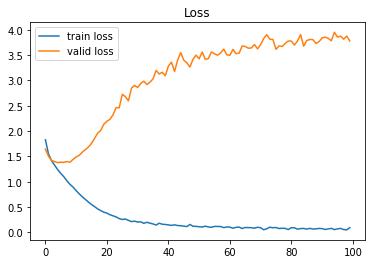

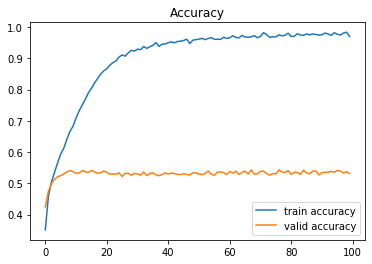

In [41]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()